[Reference](https://medium.com/mlearning-ai/feature-selection-techniques-in-machine-learning-82c2123bd548)

Feature: bmi Score: 0.1773650613462161
Feature: s5 Score: 0.14539766829590528
Feature: s6 Score: 0.11068231858827993
Feature: s4 Score: 0.09240386957032687
Feature: s1 Score: 0.07190530294538977
Feature: s3 Score: 0.07100292698974853
Feature: bp Score: 0.054652223339683115
Feature: sex Score: 0.04735729418469159
Feature: s2 Score: 0.01092328540028209
Feature: age Score: 0.0


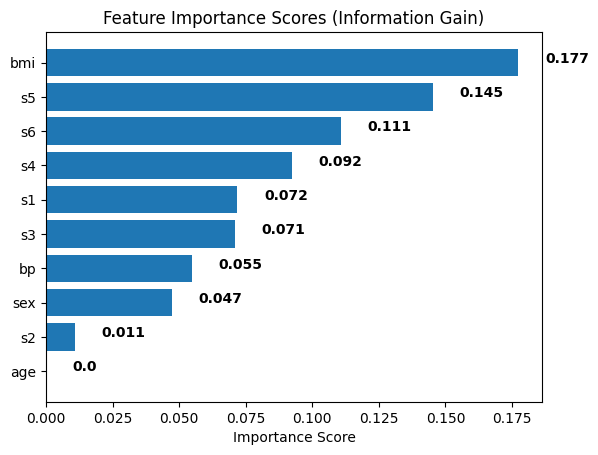

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

# Load the diabetes dataset
data = load_diabetes()

# Split the dataset into features and target
X = data.data
y = data.target

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(data.feature_names)):
    feature_scores[data.feature_names[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

In [5]:
!pip install skfeature

ERROR: Could not find a version that satisfies the requirement skfeature (from versions: none)
ERROR: No matching distribution found for skfeature


In [6]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

# Calculating scores
ranks = fisher_score.fisher_score(X, Y)

# Plotting the ranks
feat_importances = pd.Series(ranks, dataframe.columns[0:len(dataframe.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

ModuleNotFoundError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features: ('0', '1', '4', '21', '22')
Accuracy: 0.9548417721518987


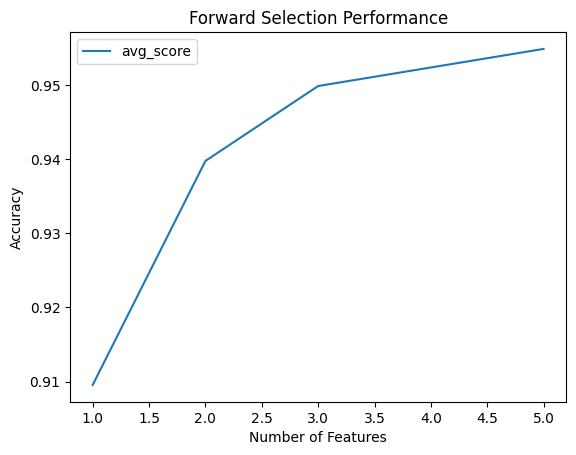

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the dataset into features and target
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the logistic regression model
model = LogisticRegression()

# Define the forward selection object
sfs = SFS(model, k_features=5, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

In [12]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import roc_auc_score

# feature_selector = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),
#            min_features=2,
#            max_features=4,
#            scoring='roc_auc',
#            print_progress=True,
#            cv=2)

# features = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)

# filtered_features= train_features.columns[list(features.k_feature_idx_)]
# filtered_features

# clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
# clf.fit(train_features[filtered_features].fillna(0), train_labels)

# train_pred = clf.predict_proba(train_features[filtered_features].fillna(0))
# print('Accuracy on training set: {}'.format(roc_auc_score(train_labels, train_pred[:,1])))

# test_pred = clf.predict_proba(test_features[filtered_features].fillna(0))
# print('Accuracy on test set: {}'.format(roc_auc_score(test_labels, test_pred [:,1])))

Top 10 feature rankings:
1. Elevation: 0.24225225565321606
2. Horizontal_Distance_To_Roadways: 0.11584616951834763
3. Horizontal_Distance_To_Fire_Points: 0.11003012104573166
4. Horizontal_Distance_To_Hydrology: 0.060487531807072975
5. Vertical_Distance_To_Hydrology: 0.05771057964456472
6. Aspect: 0.04805329999799563
7. Hillshade_Noon: 0.043356766603921286
8. Hillshade_3pm: 0.041634749814412515
9. Hillshade_9am: 0.04127876201520748
10. Slope: 0.033502355088889116


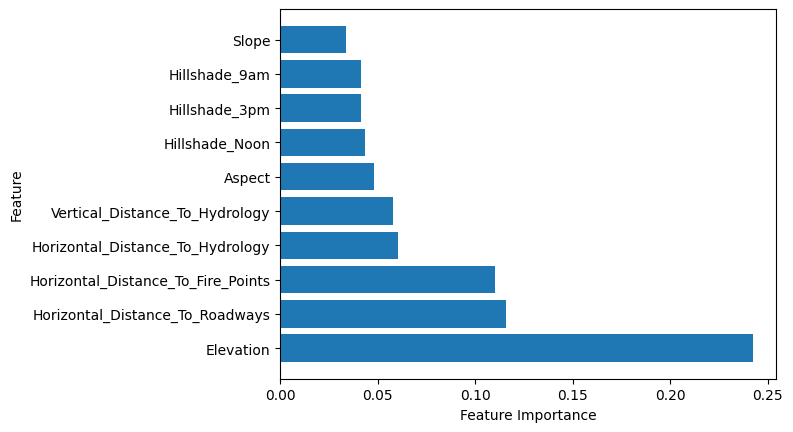

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Covertype dataset
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz",
    header=None,
)

# Assign column names
cols = (
    [
        "Elevation",
        "Aspect",
        "Slope",
        "Horizontal_Distance_To_Hydrology",
        "Vertical_Distance_To_Hydrology",
        "Horizontal_Distance_To_Roadways",
        "Hillshade_9am",
        "Hillshade_Noon",
        "Hillshade_3pm",
        "Horizontal_Distance_To_Fire_Points",
    ]
    + ["Wilderness_Area_" + str(i) for i in range(1, 5)]
    + ["Soil_Type_" + str(i) for i in range(1, 41)]
    + ["Cover_Type"]
)

data.columns = cols

# Split the dataset into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]


# Select the top 10 features
num_features = 10
top_indices = indices[:num_features]
top_importances = importances[top_indices]


# Print the top 10 feature rankings
print("Top 10 feature rankings:")
for f in range(num_features):  # Use num_features instead of 10
    print(f"{f+1}. {X_train.columns[indices[f]]}: {importances[indices[f]]}")
# Plot the top 10 feature importances in a horizontal bar chart
plt.barh(range(num_features), top_importances, align="center")
plt.yticks(range(num_features), X_train.columns[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

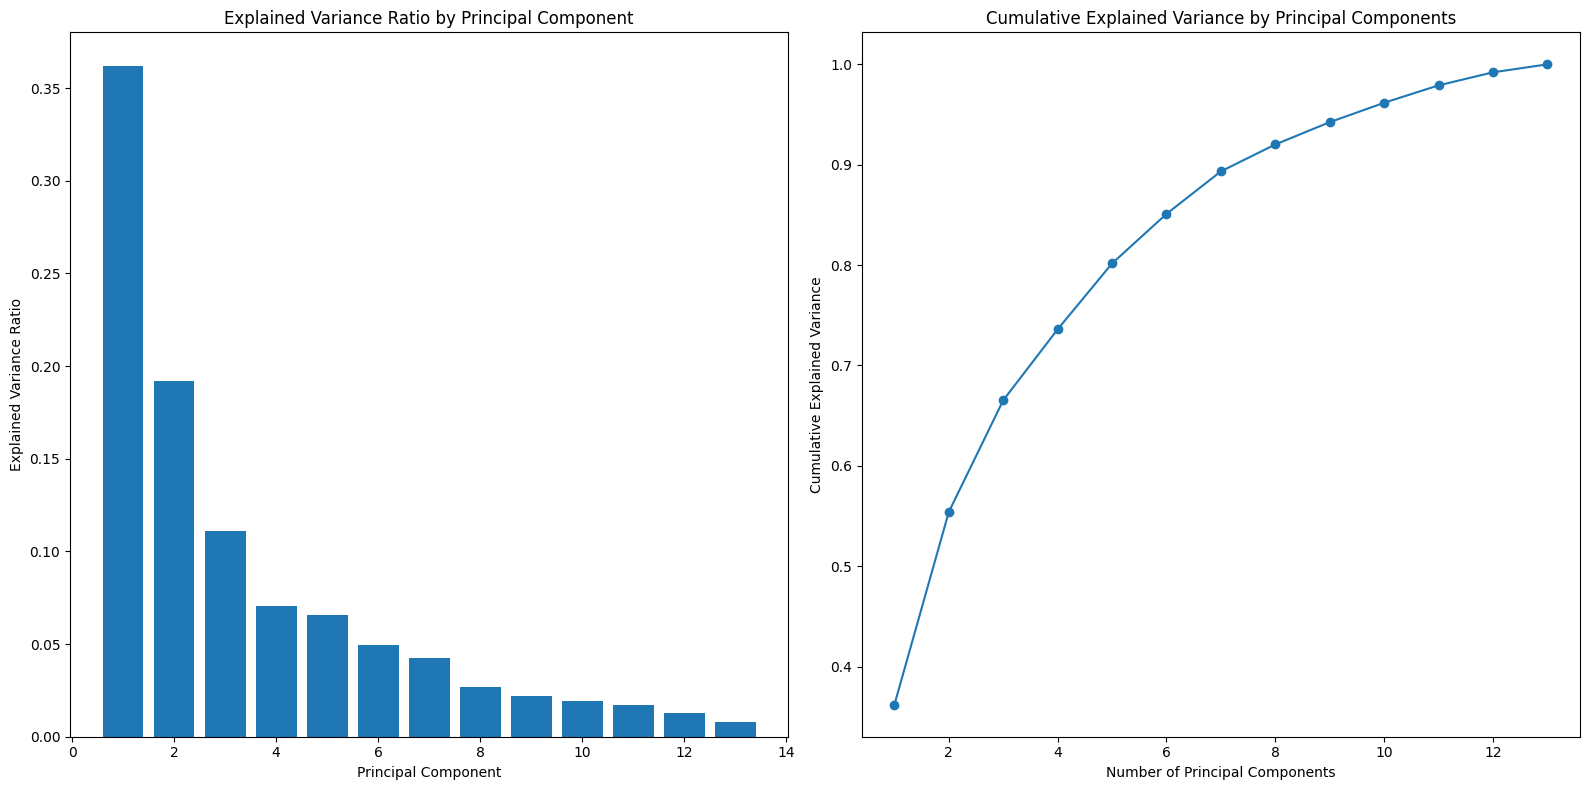

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")

# Display the figure
plt.tight_layout()
plt.show()

In [9]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
X, _ = load_digits(return_X_y=True)
transformer = FastICA(n_components=7,
         random_state=0,
         whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
X_transformed.shape

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


(1797, 7)

In [10]:
import numpy as np
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [11]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(4, 2)